# AdaBoost

首先看下AdaBoost算法的实现以及和SVM的对比

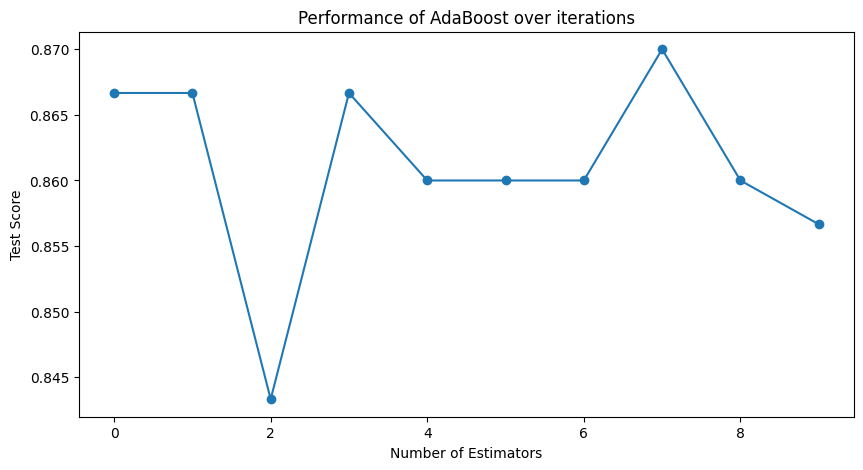

Accuracy: 85.67% 83.67% 87.67%


In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

features_ = 20
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42)
# X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=2024)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建AdaBoost模型实例
ada_classifier = AdaBoostClassifier(n_estimators=10, random_state=42)
svm_classifier = SVC(kernel='rbf')
# 创建决策树分类器实例
dt_classifier = DecisionTreeClassifier(random_state=42)

# 训练模型
ada_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# 绘制每次迭代后的测试分数
test_scores = list(ada_classifier.staged_score(X_test, y_test))

plt.figure(figsize=(10,5))
plt.plot(test_scores, "-o")
plt.xlabel('Number of Estimators')
plt.ylabel('Test Score')
plt.title('Performance of AdaBoost over iterations')
plt.show()


# 使用测试集进行预测
y_pred = ada_classifier.predict(X_test)
y_pred2 = svm_classifier.predict(X_test)
y_pred3 = dt_classifier.predict(X_test)

# 计算准确率
acc1 = accuracy_score(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred2)
acc3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {acc1 * 100:.2f}% {acc2 * 100:.2f}% {acc3 * 100:.2f}%")

## 什么是AdaBoost

AdaBoost为英文"Adaptive Boosting"（自适应增强）的缩写，是一种机器学习方法，由约阿夫·弗罗因德和罗伯特·沙皮尔提出。[1]AdaBoost方法的自适应在于：前一个分类器分错的样本会被用来训练下一个分类器。AdaBoost方法对于噪声数据和异常数据很敏感。

AdaBoost方法是一种迭代算法，在每一轮中加入一个新的弱分类器，直到达到某个预定的足够小的错误率。每一个训练样本都被赋予一个权重，表明它被某个分类器选入训练集的概率。如果某个样本点已经被准确地分类，那么在构造下一个训练集中，它被选中的概率就被降低；相反，如果某个样本点没有被准确地分类，那么它的权重就得到提高。通过这样的方式，AdaBoost方法能“聚焦于”那些较难分（更富信息）的样本上。在具体实现上，最初令每个样本的权重都相等，对于第k次迭代操作，我们就根据这些权重来选取样本点，进而训练分类器Ck。然后就根据这个分类器，来提高被它分错的样本的权重，并降低被正确分类的样本权重。然后，权重更新过的样本集被用于训练下一个分类器Ck[2]。整个训练过程如此迭代地进行下去。

## AdaBoost算法流程

用 $x^{i}$ 和 $y_{i}$ 表示原始样本集 $D$ 的样本点和它们的类标。用 $W_{k}(i)$ 表示第 $k$ 次迭代时全体样本的权重分布。这样就有如下所示的 AdaBoost算法:
1. 初始化: 输入参数为训练集 $D=\left\{x^{1}, y_{1}, \ldots, x^{n}, y_{n}\right\}$, 最大循环次数 $k_{\text{max}}$ ，采样权重 $W_{k}(i)=1 / n, i=1, \ldots, n$;
2. 迭代计数器 $k$ 赋值为 0;
3. 计数器 $\mathrm{k}$ 自增1;
4. 使用 $\mathrm{W}_{\mathrm{k}}(\mathrm{i})$ 采样权重对弱学习器 $\mathrm{C}_{\mathrm{k}}$ 进行训练;
5. 对弱学习器 $\mathrm{C}_{\mathrm{k}}$ 的训练结果进行评估并记录进误差矩阵 $\mathrm{E}_{\mathrm{k}}$ 中;
6. $\alpha_{k} \leftarrow \frac{1}{2} \ln \frac{1-E_{k}}{E_{k}}$
7. $W_{k+1}(i) \leftarrow \frac{W_{k}(i)}{Z_{k}} \times\left\{\begin{array}{ll}e^{-\alpha_{k}}, & \text{if } h_{k}\left(x^{i}\right)=y_{i} \\ e^{\alpha_{k}}, & \text{if } h_{k}\left(x^{i}\right) \neq y_{i}\end{array}\right.$
8. 当 $k=k_{\text{max}}$ 时停止训练
9. 返回结果 $C_{k}$ 和 $\alpha_{k}, k=1, \ldots, k_{\text{max}}$ (带权值分类器的总体)
10. 结束

注意第 5 行中, 当前权重分布必须考虑到分类器 $C_{k}$ 的误差率。在第 7 行中, $z_{k}$ 只是一个归一化系数, 使得 $W_{k}(i)$ 能够代表一个真正的分布, 而 $h_{k}\left(x^{j}\right)$ 是分量分类器 $C_{k}$ 给出的对任一样本点 $x^{i}$ 的标记 ($+1$ 或 -1$), $h_{k}\left(x^{i}\right)=y_{i}$ 时, 样本被正确分类。第 8 行中的迭代停止条件可以被换为判断当前误差率是否小于一个阈值。

最后的总体分类的判决可以使用各个分量分类器加权平均来得到:
$$
g(x)=\left[\sum_{k=1}^{k_{\max}} \alpha_{k} h_{k}(x)\right]
$$

这样, 最后对分类结果的判定规则是:
$$
H(x)=\operatorname{sign}(g(x))
$$

### 什么是弱学习器

在机器学习和特别是在集成学习中，弱学习器（weak learner）指的是一个预测能力仅略好于随机猜测的模型。这种类型的学习器通常性能不是非常强大，但是它们的主要优势在于可以组合多个弱学习器来构建一个更强大的模型，这种方法称为提升（boosting）。

#### 弱学习器的特点
1. **性能略优于随机猜测**：通常，弱学习器的预测准确率只需要略高于随机猜测。例如，在二分类问题中，随机猜测的准确率为50%，弱学习器的准确率可能只需稍高于50%。
2. **简单性**：弱学习器往往结构简单，如决策树的浅层版本（如决策树桩或一层决策树），或是线性模型等。
3. **计算成本低**：由于其结构简单，弱学习器的训练通常比较快，消耗的计算资源较少。

#### 弱学习器在提升中的作用
在提升算法中，如AdaBoost，多个弱学习器被顺序地训练，每一个后续的学习器都侧重于之前学习器错分的那些样本。通过这种方式，集成的每个学习器都尝试纠正前一个学习器的错误，最终得到一个强学习器（strong learner），即一个表现出色的模型。每个弱学习器对最终决策的贡献权重通常与其性能有关，性能越好的学习器在最终决策中的权重越大。

#### 总结
因此，步骤4中提到的“使用权重对弱学习器进行训练”指的是在AdaBoost等提升算法中，利用更新后的样本权重来训练一个新的弱学习器，使其能够关注并更好地分类那些之前被误分类的样本。这种方法通过逐步增强弱学习器的集成来提高整体模型的预测精度。


## 训练过程

在提升算法（如AdaBoost）中，多个弱学习器确实是顺序连接在一起的，每个学习器都在前一个学习器的基础上进行改进，以提高整体模型的性能。这种顺序连接的过程可以详细说明如下：

1. 初始化权重：初始时，所有训练样本的权重都设置为相等，通常是 1/N，其中 N 是样本的总数。

2. 训练第一个学习器：使用初始权重训练第一个弱学习器。这个学习器可能只是略微好于随机猜测。

3. 计算误差和更新权重：训练完成后，计算这个学习器的错误率。根据错误率，对样本权重进行更新，使得被当前学习器错误分类的样本在后续的训练中获得更高的权重。

4. 训练后续学习器：使用更新后的权重训练下一个弱学习器。新的学习器将更加关注那些之前被错误分类的样本。

5. 重复步骤：重复上述过程，每次都根据前一个学习器的表现来调整样本权重，并训练新的学习器。

6. 组合学习器：最终，所有的弱学习器通过某种特定的方法（如加权投票）组合起来，形成一个强学习器。每个弱学习器的投票权重通常与其性能（即误差率）成反比。

这种顺序连接和迭代加强的过程使得每个后续的学习器都能在前一个学习器的基础上进行改进，逐步减少整体的错误率，从而提高模型的总体性能。这与简单的并行集成学习（如随机森林中的决策树）不同，后者通常是独立训练每个学习器，然后进行结果的平均或多数投票。

## 模型可视化

10


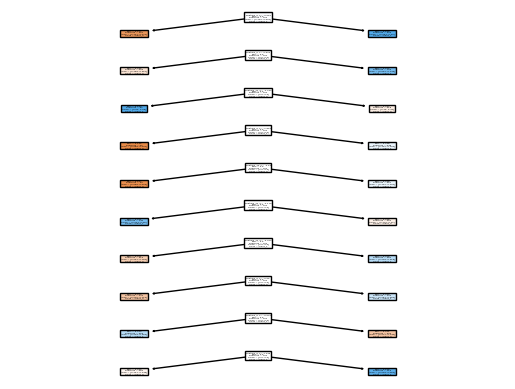

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
print(len(ada_classifier.estimators_))
for idx in range(len(ada_classifier.estimators_)):
    tree = ada_classifier.estimators_[idx]
    plt.subplot(len(ada_classifier.estimators_), 1, idx+1)
    plot_tree(tree, filled=True, feature_names=['Feature_'+str(i) for i in range(features_)], class_names=['Class_0', 'Class_1'])
plt.show()